In [4]:
import tensorflow

In [61]:
import pandas as pd
import sklearn
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [6]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator   

In [7]:
data=pd.read_csv('Data/Alcohol_Sales.csv',index_col=0,parse_dates=True)

In [10]:
data.columns=['sales']
data

,sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


In [11]:
len(data)

325

In [12]:
325-12

313

In [13]:
train=data.iloc[:313]
test = data.iloc[313:]

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [25]:
scales_train=scaler.transform(train)

In [26]:
scaled_test = scaler.transform(test)

In [43]:
n_feature=1
n_input=12
generator= TimeseriesGenerator(scales_train,scales_train,length=n_input,batch_size=1)

In [44]:
x,y =generator[0]

In [45]:
x

array([[[0.03658432],
        [0.03649885],
        [0.08299855],
        [0.13103684],
        [0.1017181 ],
        [0.12804513],
        [0.12266006],
        [0.09453799],
        [0.09359774],
        [0.10496624],
        [0.10334217],
        [0.16283443]]])

In [46]:
y

array([[0.]])

In [47]:
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.models import Sequential

In [48]:
model = Sequential ()

In [49]:
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_feature)))

In [50]:
model.add(Dense(1))

In [53]:
model.compile(optimizer='adam',loss='mse')

In [54]:
model.fit_generator(generator,epochs=50)

Epoch 1/50
301/301 [==============================] - 5s 8ms/step - loss: 0.0220
Epoch 2/50
301/301 [==============================] - 3s 8ms/step - loss: 0.0090
Epoch 3/50
301/301 [==============================] - 3s 8ms/step - loss: 0.0086
Epoch 4/50
301/301 [==============================] - 2s 8ms/step - loss: 0.0080
Epoch 5/50
301/301 [==============================] - 3s 8ms/step - loss: 0.0072
Epoch 6/50
301/301 [==============================] - 3s 8ms/step - loss: 0.0055
Epoch 7/50
301/301 [==============================] - 3s 9ms/step - loss: 0.0048
Epoch 8/50
301/301 [==============================] - 3s 8ms/step - loss: 0.0035
Epoch 9/50
301/301 [==============================] - 3s 8ms/step - loss: 0.0034
Epoch 10/50
301/301 [==============================] - 3s 9ms/step - loss: 0.0030
Epoch 11/50
301/301 [==============================] - 3s 9ms/step - loss: 0.0024
Epoch 12/50
301/301 [==============================] - 3s 9ms/step - loss: 0.0022
Epoch 13/50
301/301 [====

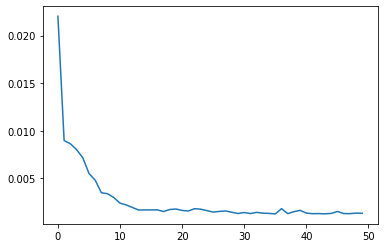

In [66]:
loss=model.history.history['loss']
plt.plot(range(len(loss)),loss)

# evaluation

In [67]:
test_predictions = []

first_eval_batch = scales_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_feature))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [69]:
true_predictions=scaler.inverse_transform(test_predictions)

In [70]:
test['Predictions'] = true_predictions

C:\Users\marziyeh\AppData\Local\Temp\ipykernel_11456\970091196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


,sales,Predictions
DATE,,
2018-02-01,10415,11514.309371
2018-03-01,12683,12838.012178
2018-04-01,11919,12396.469696
2018-05-01,14138,14398.345953
2018-06-01,14583,15166.122952
2018-07-01,12640,12180.260288
2018-08-01,14257,14001.523660
2018-09-01,12396,12431.728719
2018-10-01,13914,13441.556215


In [73]:
test.head(3)

,sales,Predictions
DATE,,
2018-02-01,10415,11514.309371
2018-03-01,12683,12838.012178
2018-04-01,11919,12396.469696


<AxesSubplot:xlabel='DATE'>

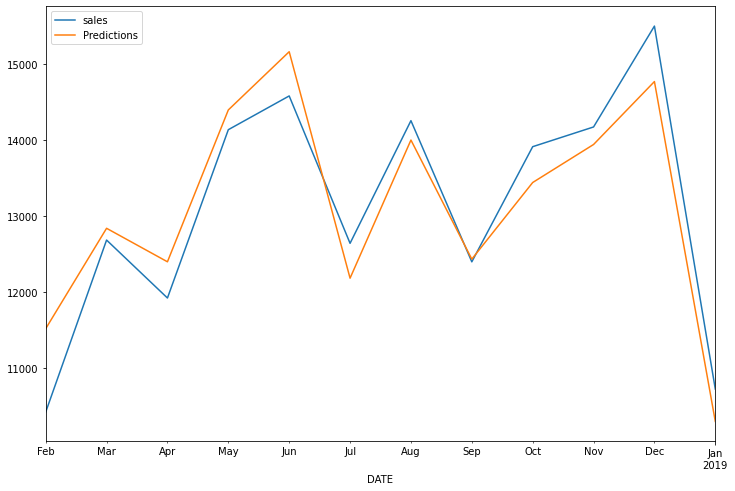

In [71]:
test.plot(figsize=(12,8))